<a href="https://colab.research.google.com/github/carlos-edhr/tensorflow-zero-to-mastery/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow



In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

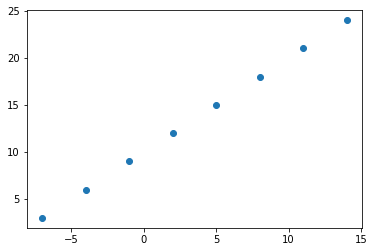

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# Create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it 
plt.scatter(X, y);

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape 
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
X[0].ndim

0

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

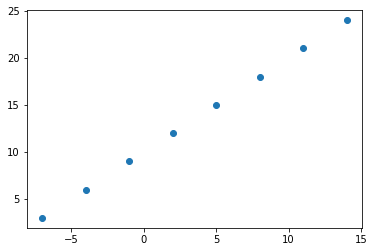

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error 
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent 
              metrics=["mae"]
              ) 


# 3. Fit the model
model.fit(X, y, epochs=5)




Epoch 1/5
1/1 [==============================] - 0s 317ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 10.9748 - mae: 10.9748


In [19]:
# Check out X and y 
X, y 

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
# Try and make a prediction  using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [13]:
y_pred + 11


array([[23.71602]], dtype=float32)

## Improving our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation functioon of each layer. 
2. ***Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from). 

In [24]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(1)         
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 383ms/step - loss: 14.4065 - mae: 14.4065
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.2006 - mae: 14.2006
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 14.0202 - mae: 14.0202
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8583 - mae: 13.8583
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7095 - mae: 13.7095
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5693 - mae: 13.5693
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4340 - mae: 13.4340
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3001 - mae: 13.3001
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1645 - mae: 13.1645
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0238 - mae: 13.0238
Epoch 11/100
1/1 [==============================] - 0s 1

In [25]:
# Remind ourselves of the data 
X, y 

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [26]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[19.050516]], dtype=float32)

In [44]:
 # Let's see if we can make another change to improve our model

 # 1. Create the model (this time with an extra hidden layer with 100 hidden nunits)
 model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None ),
    tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model 
 model.compile(loss="mae",
               optimizer= tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])
 
 # 3. Fit the model
 model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 341ms/step - loss: 12.5935 - mae: 12.5935
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8304 - mae: 11.8304
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0619 - mae: 11.0619
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2860 - mae: 10.2860
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4991 - mae: 9.4991
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6976 - mae: 8.6976
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8786 - mae: 7.8786
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0401 - mae: 7.0401
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7836 - mae: 6.7836
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2244 - mae: 7.2244
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - lo

In [45]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [46]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.528288]], dtype=float32)